<a href="https://colab.research.google.com/github/Viviankatheu/KNN-Naive-Bayes-Classification-models/blob/main/Vivian_Katheu_Moringa_Week_9_Core_Independent_Project_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K- Nearest Neighbors Classification

##1.Defining the Question

Implementing a K-Nearest Neighbours to perform Classification on the Titanic dataset

###a) Specifying the Question

Use Machine Learning to create a model that predicts whether a passenger survived or not.

###b)Defining the Metric for Success

To create a model that achieves an accuracy level of atleast 70%. The confusion matrix with the lowest false positives and false negatives.

###c)Recording the Experimental Design

To specify the question

Find and deal with outliers and other anomalies such as missing data and duplicates

Perform exploratory data analysis on the dataset. I will do both univariate and bivariate analysis.

Build classification model using K- Nearest Neighbors to analyse whether a passenger survived or not.

Draw a conclusion & make a recommendation

###d)Data Relevance

The data was relevant for our study.

##2.Reading the Data

In [3]:
#Importing the libraries we will use in this analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [4]:
#Loading our data

df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##3.Checking the Data

In [5]:
#Viewing the top of our dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Viewing the bottom of our dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#Checking the shape of our dataset
df.shape

(891, 12)

In [8]:
#Checking the datatypes of our columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##4.External Datasource Validation

##5.Tidying the Dataset

In [9]:
#Checking for duplicates

df.duplicated().value_counts()

#There are no duplicates in our dataset

False    891
dtype: int64

In [10]:
#Checking for missing values in our data

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#We will drop the Cabin column which has almost all values missing

df.drop(columns='Cabin', inplace = True)

In [12]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [14]:
#We will drop the 2 missing values in the embarked column

df.dropna(inplace = True)

In [15]:
df.isnull().sum().sum()

0

In [16]:
#Changing the column names to lower case

df.columns = map(str.lower,df.columns)
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [17]:
#We will drop the columns we don't need in our analysis
df.drop(columns = ['passengerid','name','ticket','fare'], inplace = True)
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [18]:
df['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

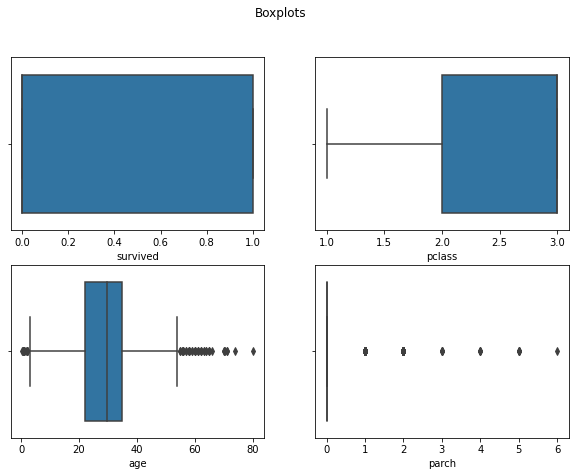

In [19]:
#Cheking for outliers using boxplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['survived'], ax=ax1)
sns.boxplot(df['pclass'], ax=ax2)
sns.boxplot(df['age'], ax=ax3)
sns.boxplot(df['parch'], ax=ax4)
plt.show()

##6.Exploratory Data Analysis

###a)Univariate Analysis

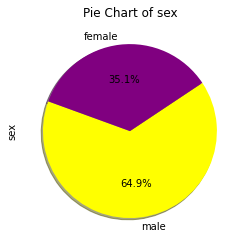

In [20]:
colors = ['yellow', 'purple']
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, 
                                               shadow = True, startangle = 160)
plt.title('Pie Chart of sex')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


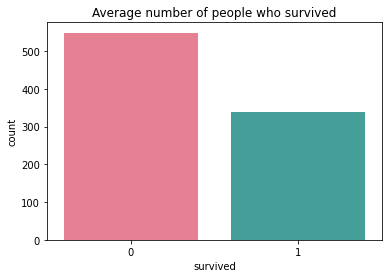

In [21]:
#Plotting countplots
sns.countplot(df['survived'], palette ='husl')
plt.title('Average number of people who survived')
plt.show()

In [22]:
#Measures of central tendency

print('The average age of the group is:', int(df['age'].mean()))

The average age of the group is: 29


In [23]:
print('The mode in the age column is: ', int(df['age'].mode()[0]))

The mode in the age column is:  29


In [24]:
print('The median of this age column is : ', int(df['age'].median()))

The median of this age column is :  29


###a)Bivariate Analysis

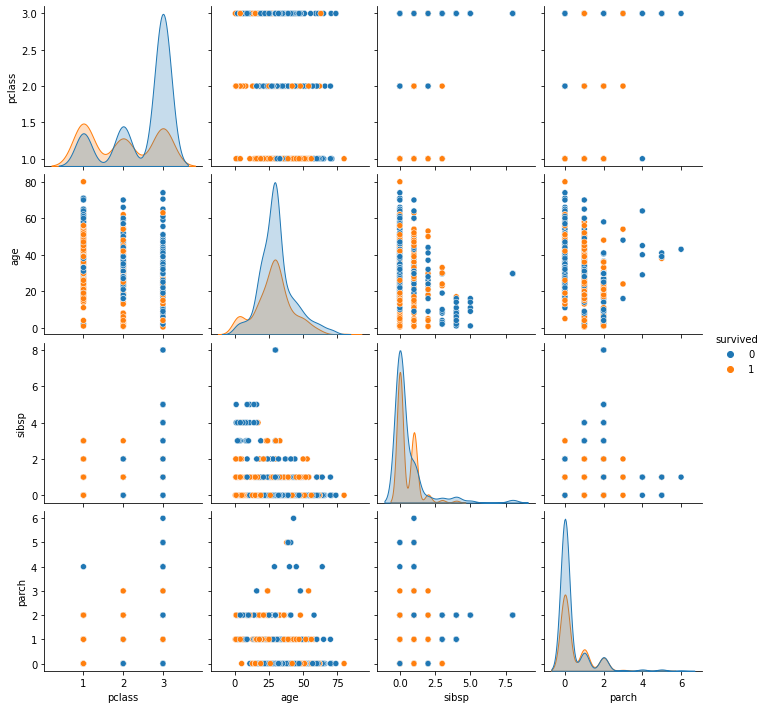

In [25]:
sns.pairplot(df, hue = 'survived')

There is no clear relationship between these variables.

In [26]:
#Checking for correlation matrix

df.corr()

,survived,pclass,age,sibsp,parch
survived,1.000000,-0.335549,-0.074673,-0.034040,0.083151
pclass,-0.335549,1.000000,-0.327954,0.081656,0.016824
age,-0.074673,-0.327954,1.000000,-0.231875,-0.178232
sibsp,-0.034040,0.081656,-0.231875,1.000000,0.414542
parch,0.083151,0.016824,-0.178232,0.414542,1.000000


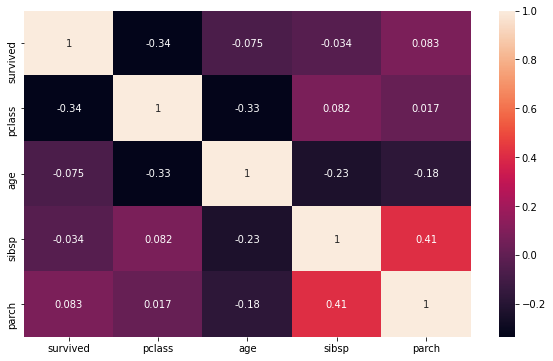

In [27]:
#Plotting a heatmap to visualize correlation

plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot= True)
plt.show()

There is no strong correlation between any variables. They all show weak correlations.

##7.Implementing the Solution

In [28]:
#We shall implement the KNN algorithm and check the accuracy of our model
#Labelencoding our data to transform the categorical features to numerical features

le = LabelEncoder()

df['sex'] = le.fit_transform(df['sex'])
df['embarked'] = le.fit_transform(df['embarked'])

In [29]:
#Lets define our label and attributes

X = df.drop('survived', axis = 1)
y = df['survived'].values

In [30]:
#Performing a train test split
#First, we will use a 80-20 split

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

In [31]:
#previewing our data
df.head()

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


In [32]:
#checking the usinque values in our columns
df.nunique()

survived     2
pclass       3
sex          2
age         89
sibsp        7
parch        7
embarked     3
dtype: int64

In [34]:
#Scaling our data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [36]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [37]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, we shall use the confusion matrix, precision, recall and f1 score metrics.   
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[81 24]
 [29 44]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       105
           1       0.65      0.60      0.62        73

    accuracy                           0.70       178
   macro avg       0.69      0.69      0.69       178
weighted avg       0.70      0.70      0.70       178

0.702247191011236


We get an accuracy score 70.2% with the 80-20 split and a k value of 3. Let's see how our model performs with a 70-30 split.

In [38]:
#Splitting our data into train and test datasets: 70-30 split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)

In [39]:
#Creating and fitting the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [40]:
#Predicting the model
y_pred = classifier.predict(X_test)

In [41]:
#Evaluating the algorithm

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[131  26]
 [ 44  66]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79       157
           1       0.72      0.60      0.65       110

    accuracy                           0.74       267
   macro avg       0.73      0.72      0.72       267
weighted avg       0.74      0.74      0.73       267

0.7378277153558053


With a 70-30 split, we achieve an accuracy score of 73.78 % which is better. et's try with a 60-40 split and see the difference.

In [42]:
#Splitting our data into train and test datasets: 60-40 split

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.40, random_state = 0)

In [43]:
#Fitting the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [44]:
#Predicting the model
y_pred = classifier.predict(X_test)

In [45]:
# Evaluating the algorithm

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[175  41]
 [ 47  93]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       216
           1       0.69      0.66      0.68       140

    accuracy                           0.75       356
   macro avg       0.74      0.74      0.74       356
weighted avg       0.75      0.75      0.75       356

0.7528089887640449


We achieve the highest accuracy with the 60-40 split. This model gave us an accuracy of 75.28%.

##8.Challenging the Solution

In [46]:
#We will challenge this solution by trying to improve the model performance.

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.40, random_state = 0)


In [47]:
#Using a feature reduction technique algorithm to improve the model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [48]:
#Fitting the model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [50]:
#Checking for the best parameters

from sklearn.model_selection import GridSearchCV
 
parameters = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['uniform'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']},
              {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 'weights': ['distance'], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'metric':['minkowski', 'euclidean', 'manhattan', 'chebyshev']}]
#The n_jobs is to set all your process to run the grid search
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy',
                           cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.60 %
Best Parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}


After checking for the best parameters, we get an accuracy level of 81.60% which is the highest percentage so far.

##9.Follow Up Questions

###a)Did we have the right Data?

Yes we did.

###b)Do we need other data to answer our question?

No the data was sufficient. 

###c)Did we have the right question?

Yes we did. 